In [1]:
import pandas, warnings

import seaborn as sns

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [2]:
colors = ["#BC9F8B", "#B5CFB7", "#C5705D", "#ACE1AF", "#B3C8CF"]

def barplot(result, **barlimit):
  if "ylabel" not in barlimit.keys():
    barlimit["ylabel"] = "Total Trip"
  if "color" not in barlimit.keys():
    barlimit["color"] = colors
  bar = result.plot.bar(rot=0, **barlimit)
  for container in bar.containers:
    bar.bar_label(container, fmt="%1.1f")

def pieplot(result, **pieargs):
  if "colors" not in pieargs.keys():
    pieargs["colors"] = colors
  pieargs["ylabel"] = ""
  plot = result.plot.pie(**pieargs);

def lineplot(result, **lineargs):
  plot = result.plot.line(**lineargs)
  plot.set_xticks(result.index);

In [3]:
url = "/content/originsales.csv"

origin = pandas.read_table(url, sep=",", parse_dates=["order_date", "ship_date"])

origin.iloc[:5, :7]

,order_id,order_date,ship_date,ship_mode,customer_id,customer,segment
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer


In [4]:
origin.iloc[:5, 7:13]

,country,city,state,postal_code,region,product_id
0,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798
1,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454
2,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240
3,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577
4,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760


In [5]:
origin.iloc[:5, 13:]

,category,sub_category,product,sales
0,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
origin.isnull().sum().sum()

0

In [7]:
origin.duplicated().sum()

1

In [8]:
origin = origin.drop_duplicates()

origin.duplicated().sum()

0

In [9]:
total_sales = origin.sales.sum()

total_order = origin.order_id.nunique()

total_sales

2261255.4107

In [10]:
total_order

4922

In [11]:
year = origin.order_date.dt.year

yearval = {"sales":"sum", "order_id":"nunique"}

columns = {"sales":"total_sales", "order_id":"total_order"}

yearly = origin.groupby(year).agg(yearval).rename(columns=columns)

yearly

,total_sales,total_order
order_date,,
2015,479574.8361,947
2016,459436.0054,1019
2017,600192.5500,1295
2018,722052.0192,1661


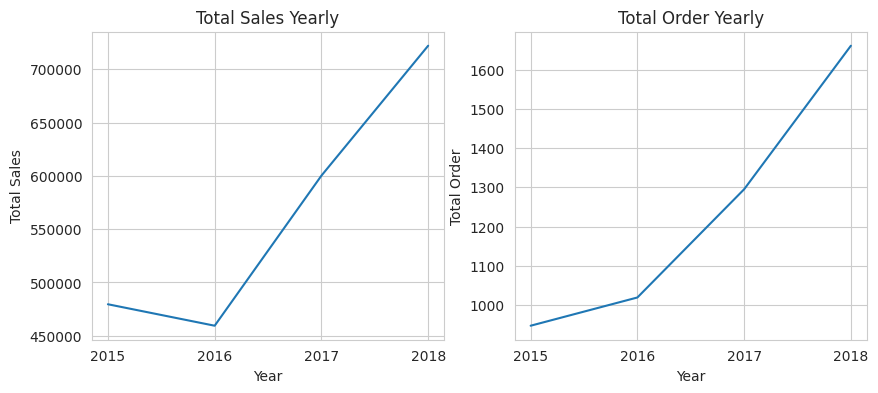

In [12]:
ylabel_one = "Total Sales"

ylabel_ore = "Total Order"

title_one = ylabel_one + " Yearly"

title_ore = ylabel_ore + " Yearly"

xlabel = "Year"

cate, axes = plt.subplots(1, 2, figsize=(10, 4))

lineplot(yearly.total_sales, title=title_one, ylabel=ylabel_one, xlabel=xlabel, ax=axes[0])

lineplot(yearly.total_order, title=title_ore, ylabel=ylabel_ore, xlabel=xlabel, ax=axes[1])

In [13]:
origin["selisih"] = origin.ship_date - origin.order_date

origin['selisih'] = origin["selisih"].dt.days

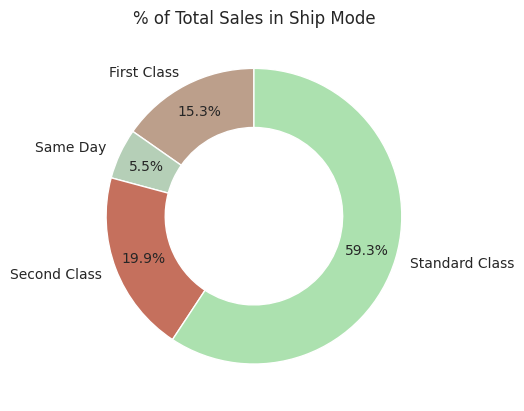

In [14]:
ratori = origin.groupby("ship_mode")["sales"].sum()

title = "% of Total Sales in Ship Mode"

pieplot(
  ratori, title=title,
  autopct='%1.1f%%', startangle=90,
  wedgeprops=dict(width=0.4), pctdistance=0.8
)

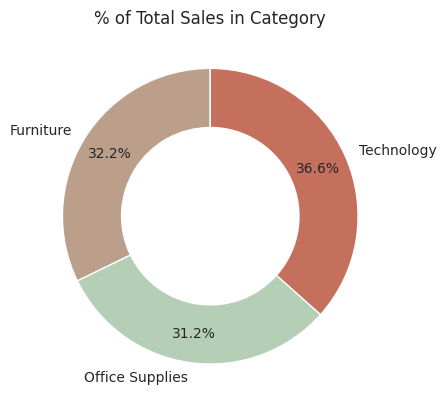

In [15]:
ratori = origin.groupby("category")["sales"].sum()

title = "% of Total Sales in Category"

pieplot(
  ratori, title=title,
  autopct='%1.1f%%', startangle=90,
  wedgeprops=dict(width=0.4), pctdistance=0.8
)

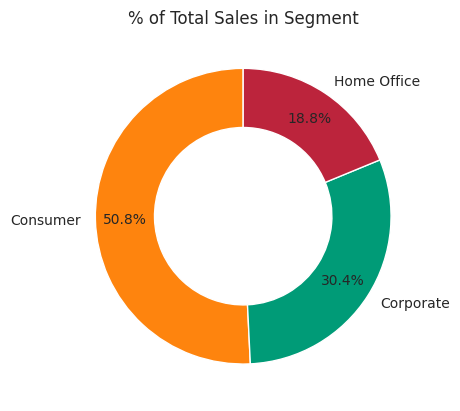

In [16]:
outer_colors = ['#FE840E','#009B77','#BC243C']

ratori = origin.groupby("segment")["sales"].sum()

title = "% of Total Sales in Segment"

pieplot(
  ratori, title=title,
  autopct='%1.1f%%', startangle=90,
  wedgeprops=dict(width=0.4), pctdistance=0.8,
  colors=outer_colors
)

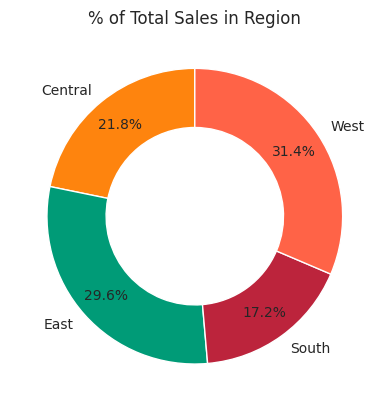

In [17]:
outer_colors = ['#FE840E','#009B77','#BC243C', '#FF6347']

ratori = origin.groupby("region")["sales"].sum()

title = "% of Total Sales in Region"

pieplot(
  ratori, title=title,
  autopct='%1.1f%%', startangle=90,
  wedgeprops=dict(width=0.4), pctdistance=0.8,
  colors=outer_colors
)

In [18]:
regional = origin.groupby(["region", "category"])[["category"]].count()

regional.iloc[:5]

category
region  category                 
Central Furniture             470
        Office Supplies      1399
        Technology            408
East    Furniture             590
        Office Supplies      1667

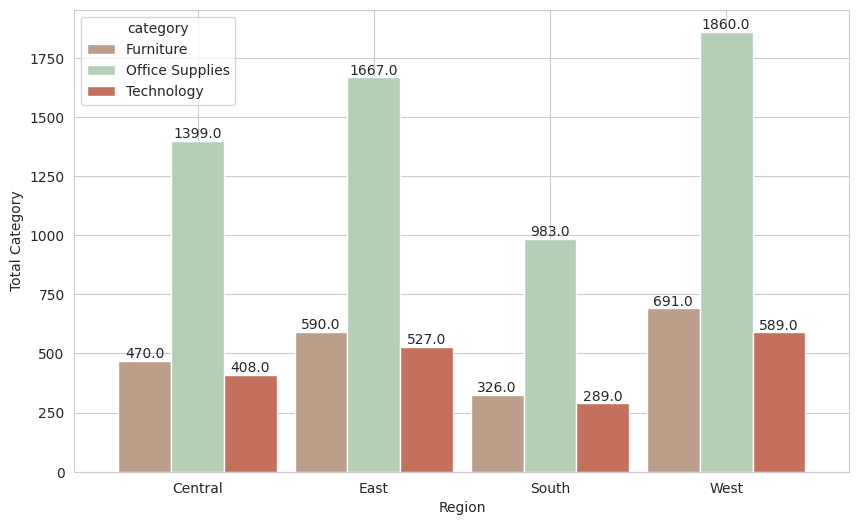

In [19]:
regi = regional.category.unstack()

barplot(regi, figsize=(10, 6), width=0.9, xlabel="Region", ylabel="Total Category")

In [20]:
regional = origin.groupby(["region", "segment"])[["segment"]].count()

regional.iloc[:5]

segment
region  segment             
Central Consumer        1188
        Corporate        661
        Home Office      428
East    Consumer        1444
        Corporate        850

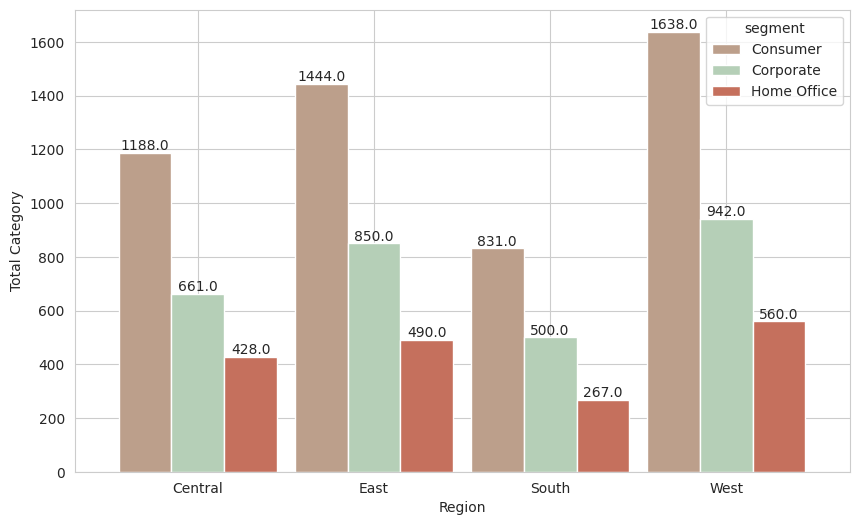

In [21]:
regi = regional.segment.unstack()

barplot(regi, figsize=(10, 6), width=0.9, xlabel="Region", ylabel="Total Category")

In [22]:
customer = origin.groupby("customer").agg({
  "sales":"sum", "order_id":"nunique"
}).rename(columns={"sales":"total_sales", "order_id":"total_order"})

customer.iloc[:5]

,total_sales,total_order
customer,,
Aaron Bergman,886.156,3
Aaron Hawkins,1744.700,7
Aaron Smayling,3050.692,7
Adam Bellavance,7755.620,8
Adam Hart,3250.337,10


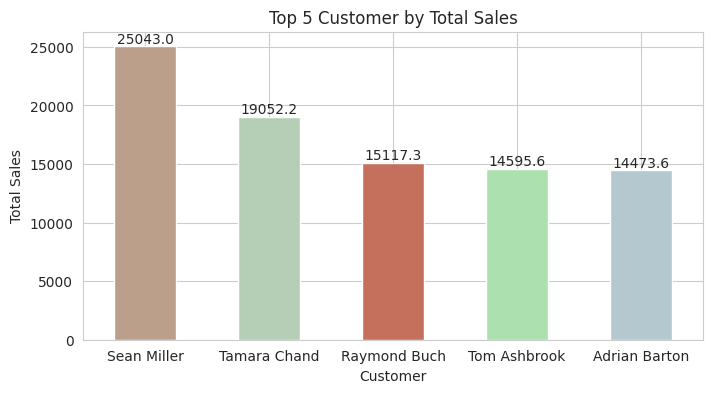

In [23]:
rato = customer.sort_values("total_sales", ascending=False).iloc[:5, 0]

title = "Top 5 Customer by Total Sales"

barplot(rato, title=title, ylabel="Total Sales", xlabel="Customer", figsize=(8, 4))

In [24]:
state = origin.groupby("state").agg({
  "sales":"sum", "order_id":"nunique"
}).rename(columns={"sales":"total_sales", "order_id":"total_order"})

state.iloc[:5]

,total_sales,total_order
state,,
Alabama,19510.6400,34
Arizona,35272.6570,107
Arkansas,11678.1300,27
California,446306.4635,1002
Colorado,31841.5980,78


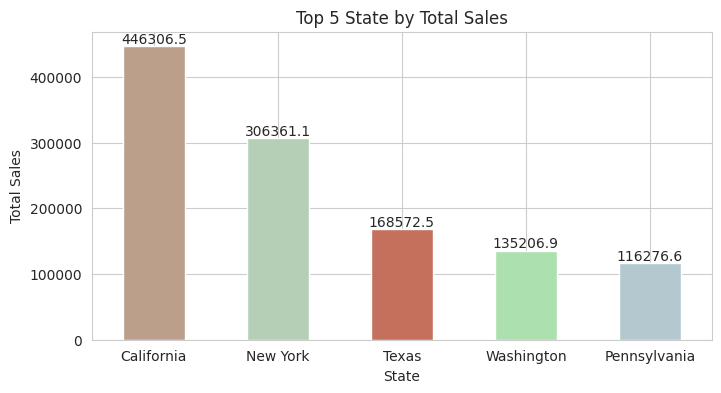

In [25]:
rato = state.sort_values("total_sales", ascending=False).iloc[:5, 0]

title = "Top 5 State by Total Sales"

barplot(rato, title=title, ylabel="Total Sales", xlabel="State", figsize=(8, 4))

In [26]:
cities = origin.groupby("city").agg({
  "sales":"sum", "order_id":"nunique"
}).rename(columns={"sales":"total_sales", "order_id":"total_order"})

cities.iloc[:5]

,total_sales,total_order
city,,
Aberdeen,25.500,1
Abilene,1.392,1
Akron,2724.244,9
Albuquerque,2220.160,7
Alexandria,5519.570,6


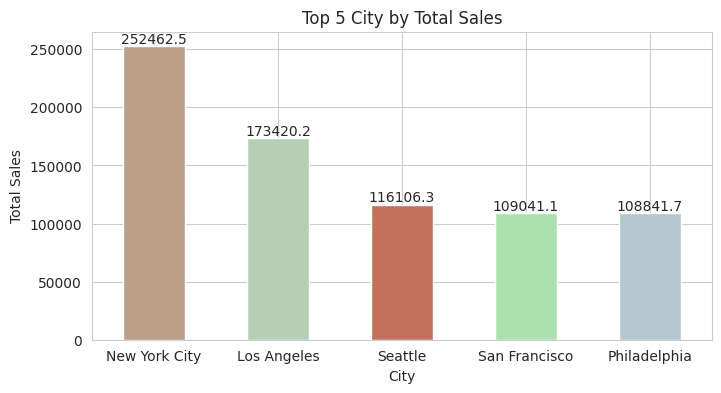

In [27]:
rato = cities.sort_values("total_sales", ascending=False).iloc[:5, 0]

title = "Top 5 City by Total Sales"

barplot(rato, title=title, ylabel="Total Sales", xlabel="City", figsize=(8, 4))

In [28]:
sucat = origin.groupby("sub_category").agg({
  "sales":"sum", "order_id":"nunique"
}).rename(columns={"sales":"total_sales", "order_id":"total_order"})

sucat.iloc[:5]

,total_sales,total_order
sub_category,,
Accessories,164186.7000,702
Appliances,104618.4030,444
Art,26705.4100,720
Binders,200028.7850,1291
Bookcases,113813.1987,222


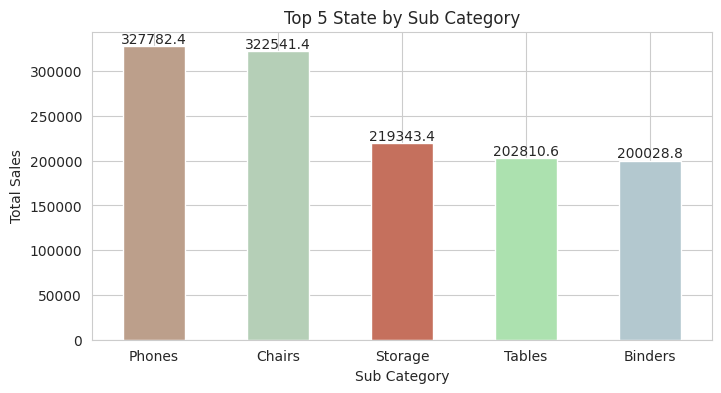

In [29]:
rato = sucat.sort_values("total_sales", ascending=False).iloc[:5, 0]

title = "Top 5 State by Sub Category"

barplot(rato, title=title, ylabel="Total Sales", xlabel="Sub Category", figsize=(8, 4))

In [30]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0']

rotati = origin.groupby("product")[["sales"]].sum()

rotati["diff"] = rotati.sales / rotati.sales.sum() * 100

rotati = rotati.sort_values("sales", ascending=False)

rotati.iloc[:5]

,sales,diff
product,,
Canon imageCLASS 2200 Advanced Copier,61599.824,2.724143
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,1.214077
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,1.001147
HON 5400 Series Task Chairs for Big and Tall,21870.576,0.967187
GBC DocuBind TL300 Electric Binding System,19823.479,0.876658


In [31]:
def autopct_format(values):
  def formater(pct):
    total = sum(values)
    val = int(round(pct*total/100.0))
    return '{v:d}'.format(v=val)
  return formater

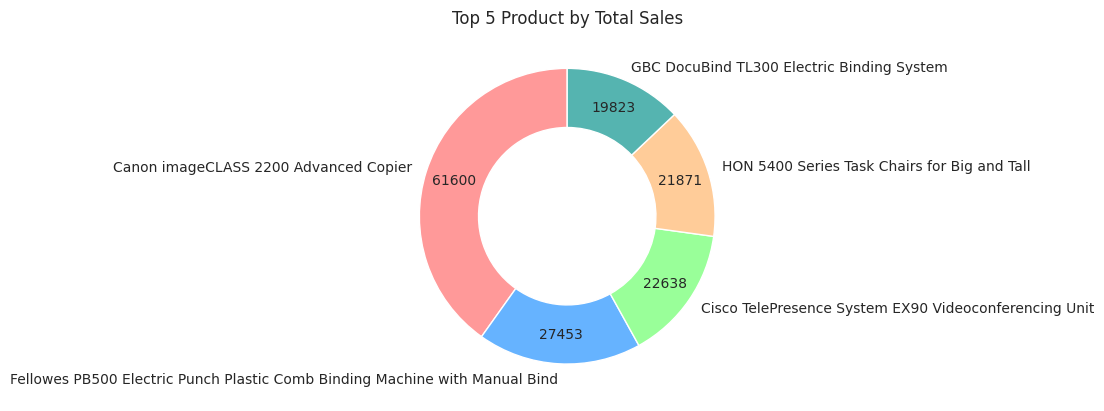

In [32]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0']

rotati = origin.groupby("product")[["sales"]].sum()

rotati = rotati.sort_values("sales", ascending=False).iloc[:5]

title = "Top 5 Product by Total Sales"

pieplot(
  rotati.sales, title=title,autopct=autopct_format(rotati.sales), startangle=90,
  wedgeprops=dict(width=0.4), pctdistance=0.8,
  colors=colors
)

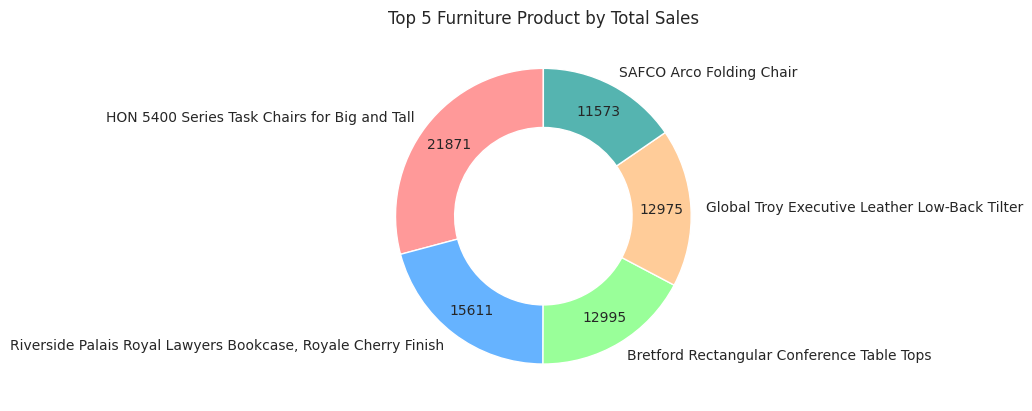

In [33]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0']

rotati = origin[origin["category"] == "Furniture"]

rotati = rotati.groupby("product")["sales"].sum()

rotati = rotati.sort_values(ascending=False).iloc[:5]

title = "Top 5 Furniture Product by Total Sales"

pieplot(
  rotati, title=title,autopct=autopct_format(rotati), startangle=90,
  wedgeprops=dict(width=0.4), pctdistance=0.8,
  colors=colors
)


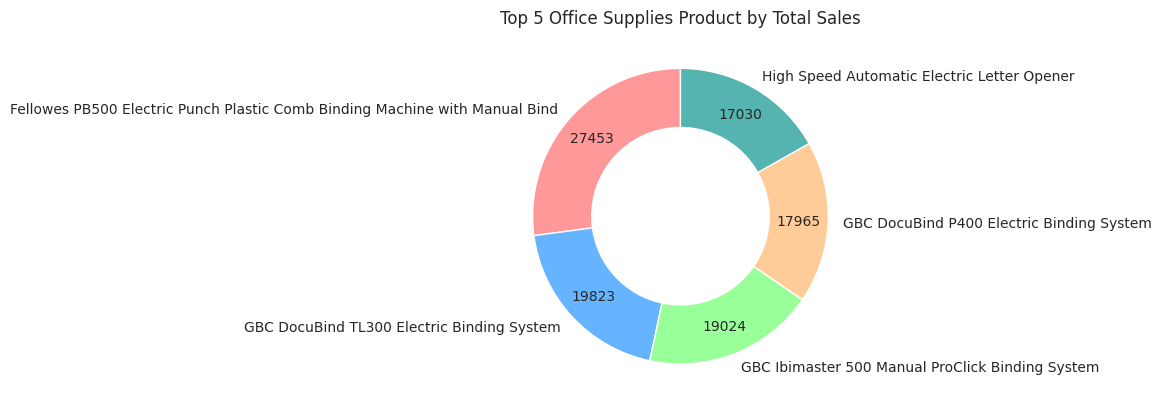

In [34]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0']

rotati = origin[origin["category"] == "Office Supplies"]

rotati = rotati.groupby("product")["sales"].sum()

rotati = rotati.sort_values(ascending=False).iloc[:5]

title = "Top 5 Office Supplies Product by Total Sales"

pieplot(
  rotati, title=title,autopct=autopct_format(rotati), startangle=90,
  wedgeprops=dict(width=0.4), pctdistance=0.8,
  colors=colors
)


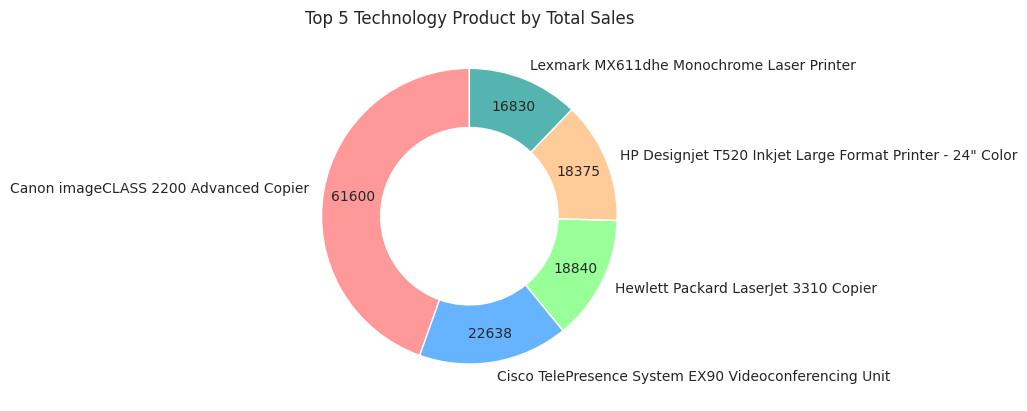

In [35]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0']

rotati = origin[origin["category"] == "Technology"]

rotati = rotati.groupby("product")["sales"].sum()

rotati = rotati.sort_values(ascending=False).iloc[:5]

title = "Top 5 Technology Product by Total Sales"

pieplot(
  rotati, title=title,autopct=autopct_format(rotati), startangle=90,
  wedgeprops=dict(width=0.4), pctdistance=0.8,
  colors=colors
)
